# The Tully-Fisher relation for disk galaxies

The Tully-Fisher (TF) relation shows that for late type galaxies (disk galaxies), the luminosity is proportional to the maximum rotational velocity of the system [Tully & Fisher 1977]().

$$L \propto v_{max}^\gamma$$

As the velocity is almost entirely a result of the dark matter component of the total mass of the galaxy, this implies that for late type galaxies, the $M_{tot}/L$ relation is pretty much constant. The TF relation with $\gamma = 4$ has proven to be a remarkable good fit for most late type galaxies, and this also holds for the disk galaxies of TNG-100.

In [1]:
import illustris_python as il
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

def circ_velocities(df, mass_key, radius_key): #dynamical velocities
    #SubhaloHalfmassRad is in units ckpc
    v= ((df[mass_key]/(df[radius_key]))**(1/2))*math.sqrt(G/1000)
    df["CircVel"]= v
    return df

def power_law (a, A, xmin, xmax):
    x = np.linspace(xmin, xmax)
    y= x**(a)*A
    return x,y
G = 4.3*10**(-3) #pc*M^-1*(km/s)^2
h = 0.678 #Planck 2015


data_path = "../data/tng100-1/cutdata/Subhalo_Centrals_minE9_SM_lateType_Gas.pkl"
data = pd.read_pickle(data_path)
#data["vsigma"] = data["SubhaloVmax"]/data["SubhaloVelDisp"]
sami = pd.read_csv("../data/SAMI/STELLAR_Details_lates.csv")

data["SubhaloHalfmassRadStellar"] = data["SubhaloHalfmassRadStellar"]/h
data["SubhaloHalfmassRadStellar_2D"] = (data["SubhaloHalfmassRadStellar"])*(3/4) #from 3d to 3d projection, from ckpc/h to kpc
sami["M_tot_dilyar"] = 10**(sami["M_tot_dilyar"])
sami["MSAMI"] = 10**(sami["MSAMI"])
#sami["V_rot"] = sami["V_rot"]*np.sqrt(3)

The stellar mass within the half-light radius is plotted as a function of the maximum velocity. The power law with $\gamma = 4$ ish shown for comparison. The relation holds well for galaxies with mass between $10^9$ and $10^{11}$.

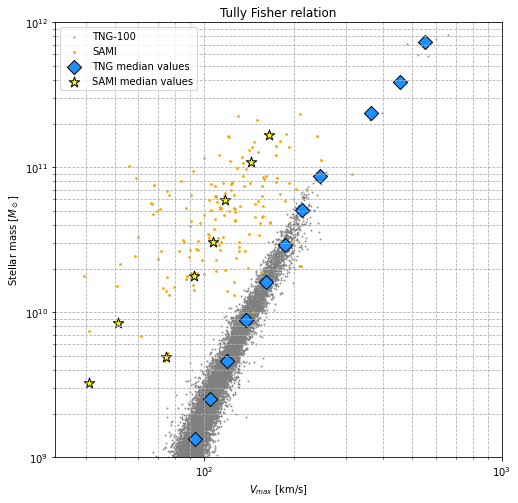

In [7]:
fig1, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
data.plot.scatter(x="SubhaloVmax", y="SubhaloMassStellar",s=1, label = "TNG-100", alpha=0.8, color="grey", ax = ax1)
sami.plot.scatter(x="V_rot", y="MSAMI",s=3, label = "SAMI", alpha=1, color="orange", ax = ax1)
#Power law to compare
#FJx, FJy = power_law(a=4, A=10**1.3, xm in=10, xmax=1000)
#ax1.plot(FJx, FJy, color = "navy", label = r"$M_* \propto \sigma^{4} $")

#median values
mTNG_x, mTNG_y = il.stats.median_values_log_y(data, "tng", "SubhaloVmax", "SubhaloMassStellar")
mS_x, mS_y = il.stats.median_values_log_y(sami, "sami", "V_rot", "MSAMI")
ax1.scatter(mTNG_x, mTNG_y, marker = "D", label = "TNG median values", s = 100, color = "dodgerblue", edgecolors = "black")
ax1.scatter(mS_x, mS_y, marker = "*", label = "SAMI median values", color = "yellow",s = 120, edgecolors = "black")
il.formatplot.Vmax_SM(title = "Tully Fisher relation", ax = ax1, x0=10**(1.5), x1=10**(3.0), y1=10**12)
plt.show()

The rotational velocity at the half mass radius is also calculated. It can be seen that this value has a lot more scatter, probably due to the scatter in size for a given stellar mass in the early type galaxies.

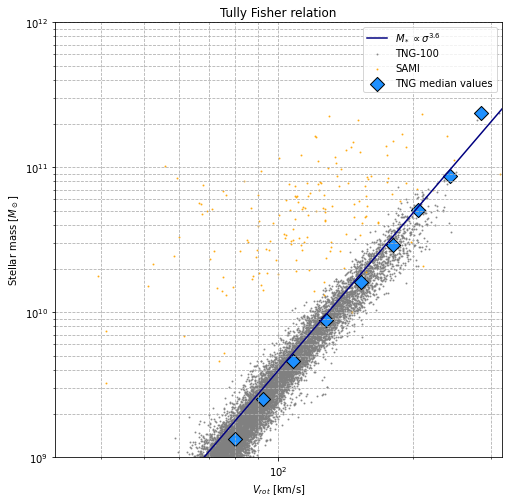

In [3]:
fig2, ax2 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
data = circ_velocities(data, "SubhaloMassInHalfRad", "SubhaloHalfmassRadStellar")
data.plot.scatter(x="CircVel", y="SubhaloMassStellar",s=1, label = "TNG-100", alpha=0.8, color="grey", ax = ax2)
#sami = circ_velocities(sami, "mstar_half", "r_e_circ")
sami.plot.scatter(x="V_rot", y="MSAMI",s=1, label = "SAMI", alpha=0.8, color="orange", ax = ax2)
#Power law to compare
FJx, FJy = power_law(a = 3.6, A= 10**(2.4), xmin = 10, xmax = 1000)
ax2.plot(FJx, FJy, color="navy", label=r"$M_* \propto \sigma^{3.6} $")

#median values
mTNG_x, mTNG_y = il.stats.median_values_log_y(data, "tng", "CircVel", "SubhaloMassStellar")
ax2.scatter(mTNG_x, mTNG_y, marker = "D", label = "TNG median values", s = 100, color = "dodgerblue", edgecolors = "black")

il.formatplot.Vmax_SM(title="Tully Fisher relation", ax=ax2)
plt.xlabel(r'$V_{rot}$ [km/s]')
plt.show()

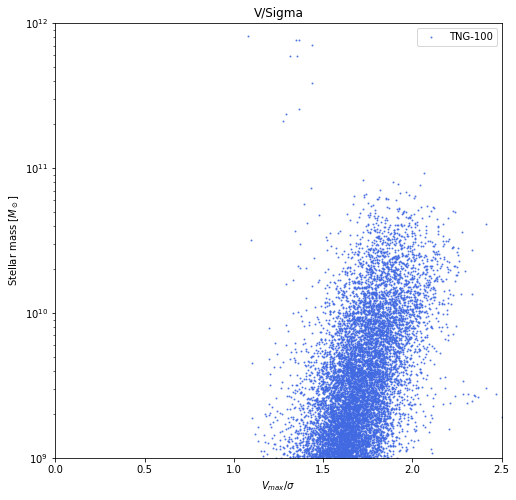

In [4]:
fig3, ax3 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
data["VSigma"] = data["CircVel"]/(data["SubhaloVelDisp"])
data.plot.scatter(x="VSigma", y="SubhaloMassStellar",s=1, label = "TNG-100", alpha=0.8, color="royalblue", ax=ax3)
#sami.plot.scatter(x="vsigma_re", y="MSAMI",s=3, label = "SAMI", alpha=1, color="orange", ax=ax3)
il.formatplot.VSigma_SM(title = "V/Sigma", ax = ax3)
plt.show()

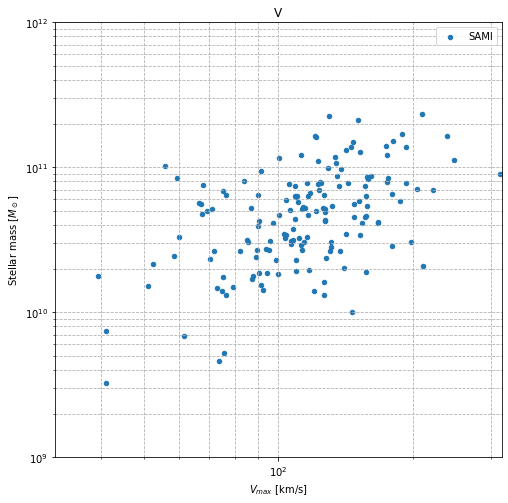

In [5]:
fig4, ax4 = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
sami.plot.scatter(x="V_rot", y = "M_tot_dilyar", ax = ax4, label = "SAMI")
il.formatplot.Vmax_SM(title = "V", ax = ax4)
plt.show()